In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Data Analysis

In [11]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Class'].abs().sort_values(ascending=False)
top_10_features = correlation_with_target.head(11).index
print(top_10_features)

Index(['Class', 'V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4',
       'V18'],
      dtype='object')


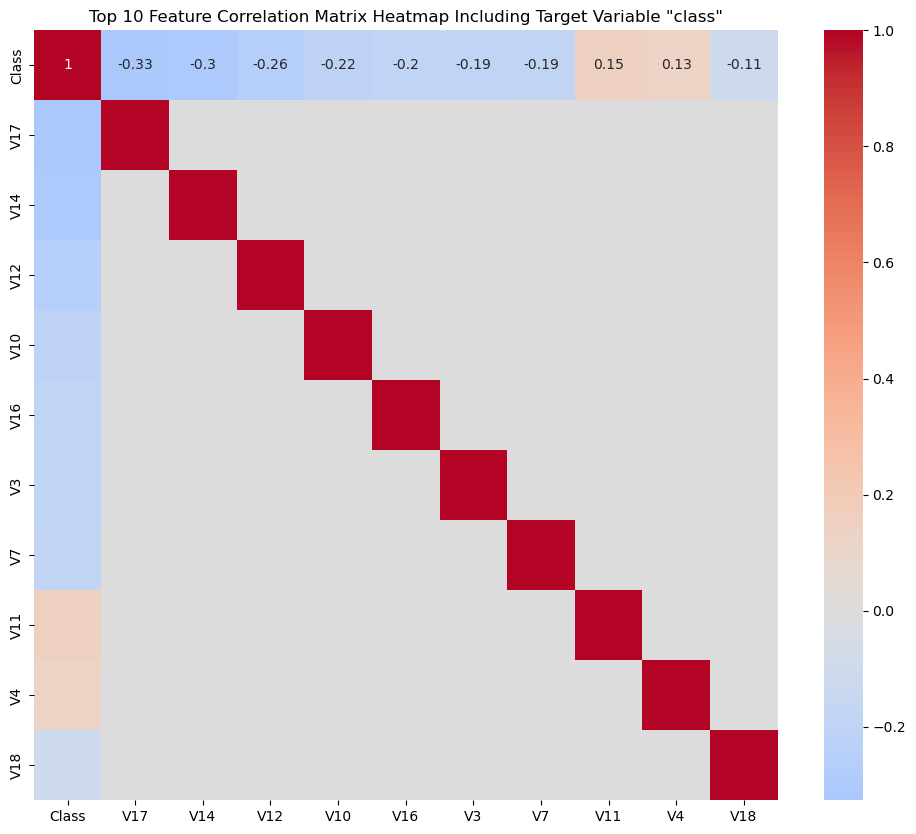

In [12]:
top_correlation_matrix = df[top_10_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Top 10 Feature Correlation Matrix Heatmap Including Target Variable "class"')
plt.show()

In [15]:
min_value = df['V17'].min()
max_value = df['V17'].max()

print(f"Minimum value of 'feature1': {min_value}")
print(f"Maximum value of 'feature1': {max_value}")

Minimum value of 'feature1': -25.1627993693248
Maximum value of 'feature1': 9.25352625047285


In [16]:
df['bins'], bin_edges = pd.qcut(df['V17'], q=6, retbins=True, labels=False)
print("Bin Edges:")
print(bin_edges)

Bin Edges:
[-25.16279937  -0.64255304  -0.34374269  -0.06567575   0.22967601
   0.62187099   9.25352625]


In [20]:
bins = [df['V17'].min(), -0.64, -0.34, -0.065, 0.23, 0.62, df['V17'].max()+1]
labels = [1, 2, 3, 4, 5, 6]
df.loc[:, 'V17 Group'] = pd.cut(df['V17'], bins=bins, labels=labels, right=False)
total = df.groupby('V17 Group', observed=True).size()
fraud_per_group = df[df['Class'] == 1].groupby('V17 Group', observed=True).size()
fraud_rate = (fraud_per_group / total * 100).reset_index(name='Percentage')
fraud_rate

,V17 Group,Percentage
0,1,0.792555
1,2,0.010469
2,3,0.014912
3,4,0.025319
4,5,0.031723
5,6,0.155439


The V17 values in the lowest bin have the highest fraud rate

Predictive Modeling

In [21]:
final = df[["V17", "V14", "V12", "V10", "V16", "V3", "V7", "V11", "V4", "V18", "Class"]]

In [22]:
X = final.drop('Class', axis=1)
y = df['Class']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 30)

In [26]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

Accuracy: 1.00
Mean Squared Error: 0.00


Prediction

In [29]:
median = final.median()
print(median)

V17     -0.065676
V14      0.050601
V12      0.140033
V10     -0.092917
V16      0.066413
V3       0.179846
V7       0.040103
V11     -0.032757
V4      -0.019847
V18     -0.003636
Class    0.000000
dtype: float64


In [30]:
X_test = pd.DataFrame({"V17":[-0.065676], "V14":[0.050601], "V12":[0.140033], "V10":[-0.092917], "V16":[0.066413], "V3":[0.179846], "V7":[0.040103], "V11":[-0.032757], "V4":[-0.019847], "V18":[-0.003636]})
predicted_fraud = model.predict(X_test)
print(f'Predicted Fraud: {predicted_fraud[0]}')

Predicted Fraud: 0
